In [1]:
!pip install qiskit qiskit-aer --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00


In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import pi
import matplotlib.pyplot as plt

sim = AerSimulator()


Task 1: Change Gate Order
Original order (X → H): {'0 0': 514, '1 0': 510}
Swapped order (H → X): {'1 0': 517, '0 0': 507}


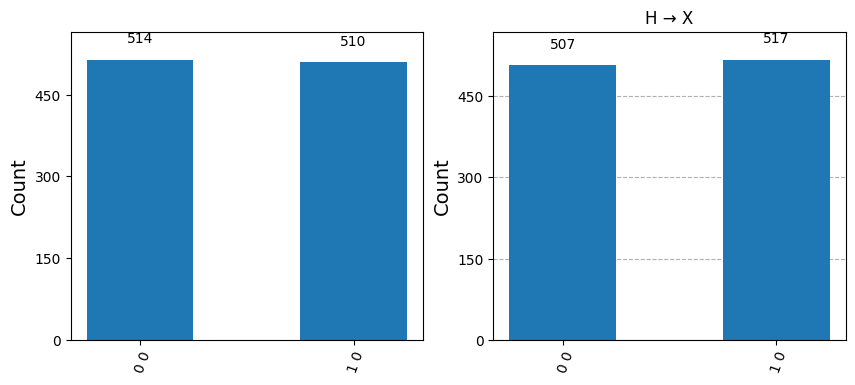

In [13]:
# TASK 1: Change Gate Order (Swap X and H)

print("\nTask 1: Change Gate Order")

# Circuit 1: Original order (X → H)
qc1 = QuantumCircuit(1, 1)
qc1.x(0)
qc1.h(0)
qc1.s(0)
qc1.t(0)
qc1.rz(0.5, 0)
qc1.measure_all()

compiled1 = transpile(qc1, sim)
result1 = sim.run(compiled1, shots=1024).result()
counts1 = result1.get_counts()

# Circuit 2: Swapped order (H → X)
qc2 = QuantumCircuit(1, 1)
qc2.h(0)
qc2.x(0)
qc2.s(0)
qc2.t(0)
qc2.rz(0.5, 0)
qc2.measure_all()

compiled2 = transpile(qc2, sim)
result2 = sim.run(compiled2, shots=1024).result()
counts2 = result2.get_counts()

print("Original order (X → H):", counts1)
print("Swapped order (H → X):", counts2)

# Plot histograms
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_histogram(counts1, ax=ax[0], title="X → H")
plot_histogram(counts2, ax=ax[1], title="H → X")
plt.show()


Task 2: Vary Rotation Angle (θ)
Theta = 0.79 radians → Counts: {'1 0': 498, '0 0': 526}
Theta = 1.57 radians → Counts: {'0 0': 527, '1 0': 497}
Theta = 3.14 radians → Counts: {'0 0': 497, '1 0': 527}


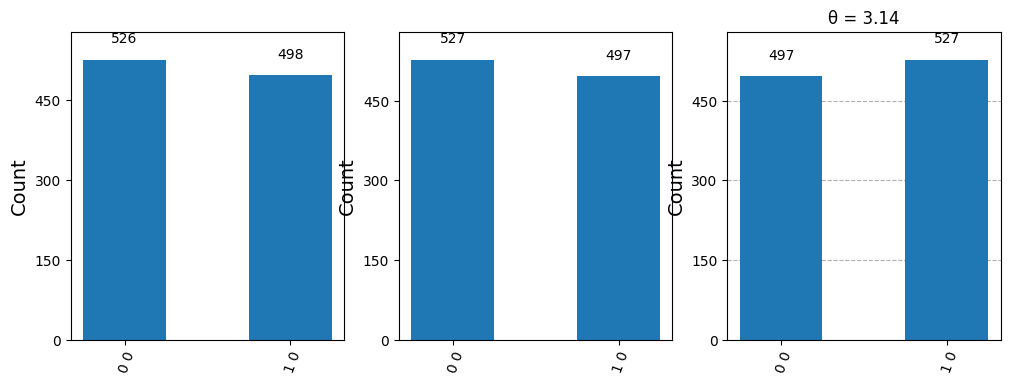

In [14]:
# TASK 2: Vary Rotation Angle θ in Rz(θ, 0)

print("\nTask 2: Vary Rotation Angle (θ)")

angles = [pi/4, pi/2, pi]
hist_data = []

for theta in angles:
    qc = QuantumCircuit(1, 1)
    qc.x(0)
    qc.h(0)
    qc.s(0)
    qc.t(0)
    qc.rz(theta, 0)
    qc.measure_all()

    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1024).result()
    counts = result.get_counts()
    hist_data.append((f"θ = {round(theta,2)}", counts))
    print(f"Theta = {theta:.2f} radians → Counts:", counts)

# Plot histograms for comparison
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, (label, data) in enumerate(hist_data):
    plot_histogram(data, ax=ax[i], title=label)
plt.show()


In [15]:
print("Task 3: Remove the Hadamard Gate")

qc3 = QuantumCircuit(1, 1)
qc3.x(0)
# qc3.h(0)  # Removed
qc3.s(0)
qc3.t(0)
qc3.rz(0.5, 0)
qc3.measure_all()

compiled3 = transpile(qc3, sim)
result3 = sim.run(compiled3, shots=1024).result()
counts3 = result3.get_counts()

print("Counts (Hadamard removed):", counts3)

Task 3: Remove the Hadamard Gate
Counts (Hadamard removed): {'1 0': 1024}
